In [1]:
import pandas as pd
import seaborn as sns
import sys
import os

# somehow need to run this first
sys.path.append(os.path.join(os.getcwd(), 'src'))

import utils

X_TRAIN_PATH = "data/interim/X_train.pkl"
Y_TRAIN_PATH = "data/interim/y_train.pkl"

X_train = utils.deserialize_data(X_TRAIN_PATH)
y_train = utils.deserialize_data(Y_TRAIN_PATH)

X_train.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
15884,25,241875,MORTGAGE,4.0,EDUCATION,A,16000,7.05,0.07,N,4
15138,21,18000,RENT,5.0,PERSONAL,B,1500,12.18,0.08,N,4
7474,25,53000,MORTGAGE,10.0,MEDICAL,B,16000,12.53,0.30,N,2
18212,28,16800,OWN,NaN,MEDICAL,C,5000,13.98,0.30,N,8
6493,25,50000,MORTGAGE,2.0,VENTURE,A,10000,7.90,0.20,N,2


In [2]:
num_col = ['person_age', 'person_income',
            'person_emp_length', 'loan_amnt',
            'loan_int_rate', 'loan_percent_income',
            'cb_person_cred_hist_length']

cat_cols = ['person_home_ownership', 'loan_intent', 'loan_grade',
            'cb_person_default_on_file']

X_train.info()


"""
Terdapat 7 kolom bertipe numerik dan 4 kolom yang bertipe kategorikal.
kolom ini nantinya perlu dipisah untuk melakukan imputasi jika diperlukan.
"""

<class 'pandas.core.frame.DataFrame'>
Index: 26064 entries, 15884 to 17068
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  26064 non-null  int64  
 1   person_income               26064 non-null  int64  
 2   person_home_ownership       26064 non-null  object 
 3   person_emp_length           25326 non-null  float64
 4   loan_intent                 26064 non-null  object 
 5   loan_grade                  26064 non-null  object 
 6   loan_amnt                   26064 non-null  int64  
 7   loan_int_rate               23563 non-null  float64
 8   loan_percent_income         26064 non-null  float64
 9   cb_person_default_on_file   26064 non-null  object 
 10  cb_person_cred_hist_length  26064 non-null  int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 2.4+ MB


'\nTerdapat 7 kolom bertipe numerik dan 4 kolom yang bertipe kategorikal.\nkolom ini nantinya perlu dipisah untuk melakukan imputasi jika diperlukan.\n'

In [4]:
print(X_train.duplicated(keep=False).sum())

X_train.sort_values(by="person_income")

"""
Terdapat 192 yang duplikat. Perlu dilakukan pengecekan
apakah data yang duplikat ini perlu didrop atau tidak.
"""

192


'\nTerdapat 192 yang duplikat. Perlu dilakukan pengecekan\napakah data yang duplikat ini perlu didrop atau tidak.\n'

In [4]:
print(X_train.isnull().sum(0))

"""
Terdapat 2 kolom yang memiliki nilai null. 
2 kolom tersebut bertipe numerik. Perlu dilakukan
imputasi.
"""

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              738
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 2501
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64


'\nTerdapat 2 kolom yang memiliki nilai null. \n2 kolom tersebut bertipe numerik. Perlu dilakukan\nimputasi.\n'

'\nDari distribusi ini, saya bisa melakukan imputasi untuk\n2 kolom person_emp_length dan loan_int_rate menggunakan\nstrategi median.\n'

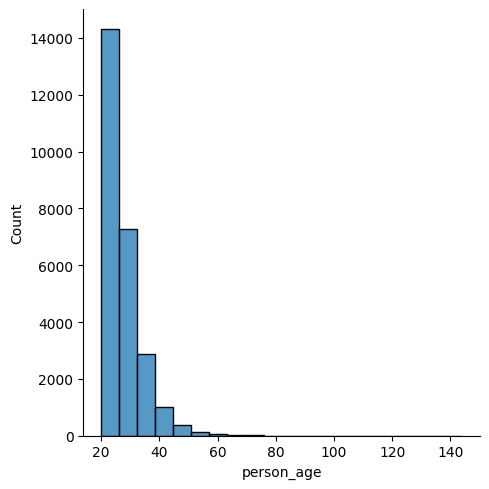

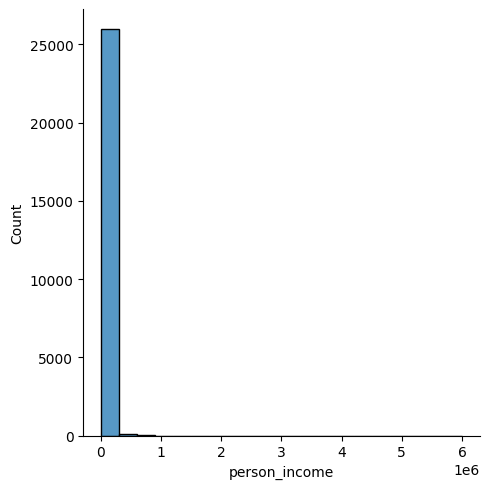

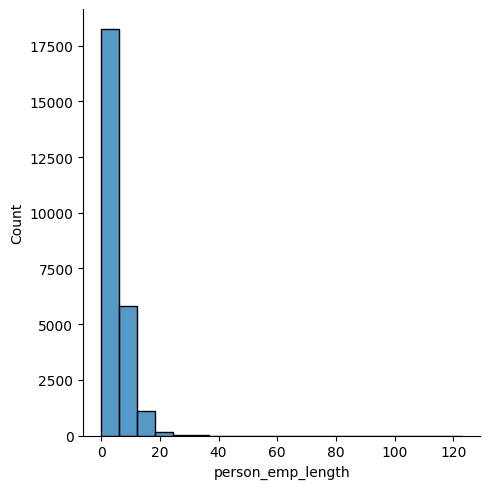

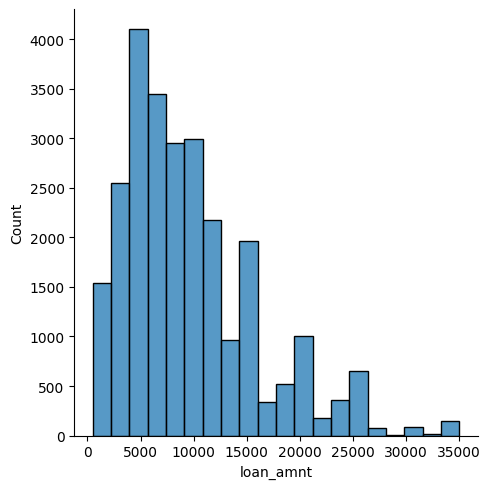

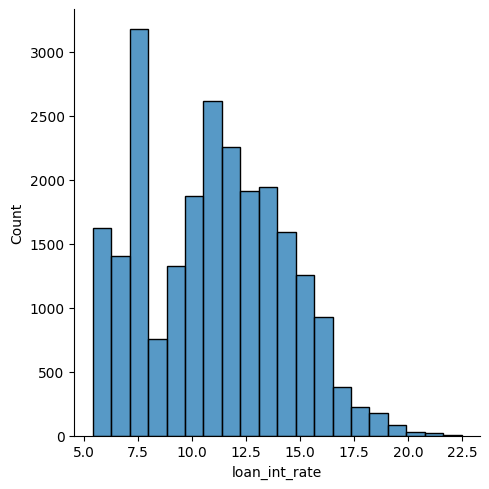

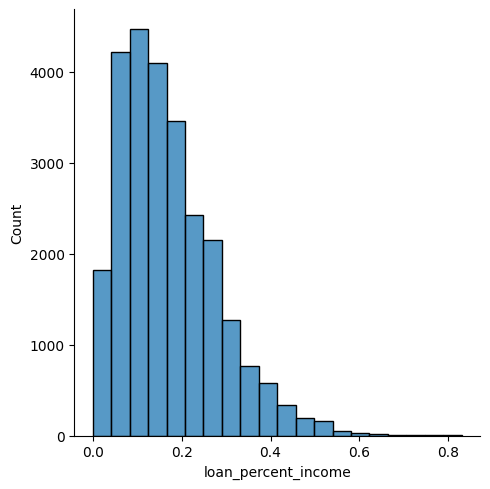

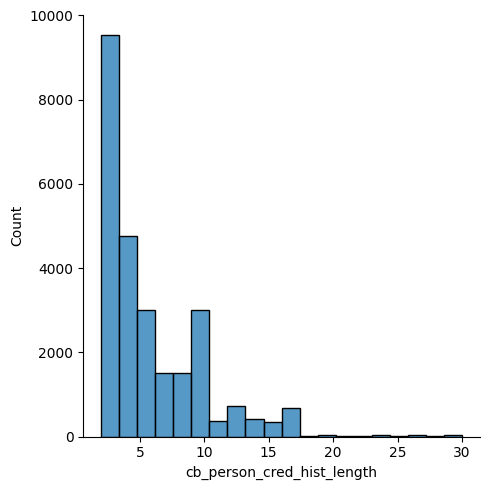

In [6]:
X_train_ = X_train[num_col]

for i, col in enumerate(X_train_.columns):
  sns.displot(X_train_[col], bins=20)

"""
Dari distribusi ini, saya bisa melakukan imputasi untuk
2 kolom person_emp_length dan loan_int_rate menggunakan
strategi median.
"""

<Axes: xlabel='loan_status', ylabel='count'>

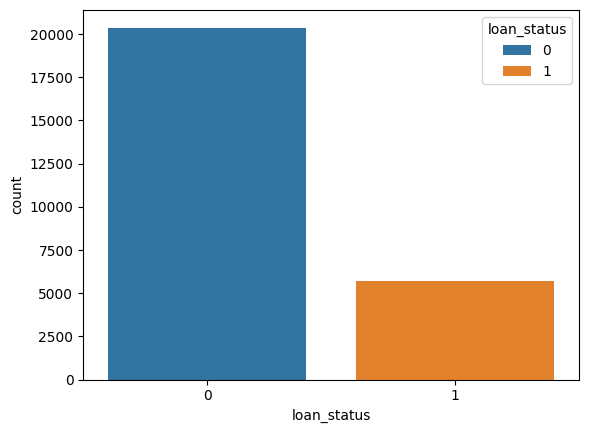

In [12]:
sns.countplot(data=pd.DataFrame(y_train, columns=['loan_status']), x="loan_status", hue="loan_status")

"""
Terdapat data yang imbalance antara loan status 1 dan 0.
"""

- Terdapat 7 kolom bertipe numerik dan 4 kolom yang bertipe kategorikal. kolom ini nantinya perlu dipisah untuk melakukan imputasi jika diperlukan.
- Terdapat 192 yang duplikat. Perlu dilakukan pengecekan apakah data yang duplikat ini perlu didrop atau tidak.
- Terdapat 2 kolom yang memiliki nilai null. 2 kolom tersebut bertipe numerik. Perlu dilakukan imputasi.
- Dari distribusi ini, saya bisa melakukan imputasi untuk 2 kolom person_emp_length dan loan_int_rate menggunakan strategi median.
- Terdapat data yang imbalance antara loan status 1 dan 0.